<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/18_fastai_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install and import fastai
!pip install -q fastai

from fastai.vision.all import *
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.4 MB/s eta 0:00:00


In [2]:
# Step 2: Load a sample image dataset
path = untar_data(URLs.PETS)/"images"
def is_cat(x): return x[0].isupper()

In [3]:
# Step 3: Define DataBlock with aug_transforms
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(do_flip=True, flip_vert=True, max_rotate=20.0, max_zoom=1.1,
                              max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)
)

In [4]:
# Step 4: Create DataLoaders
pets_dls = pets.dataloaders(path, bs=8)

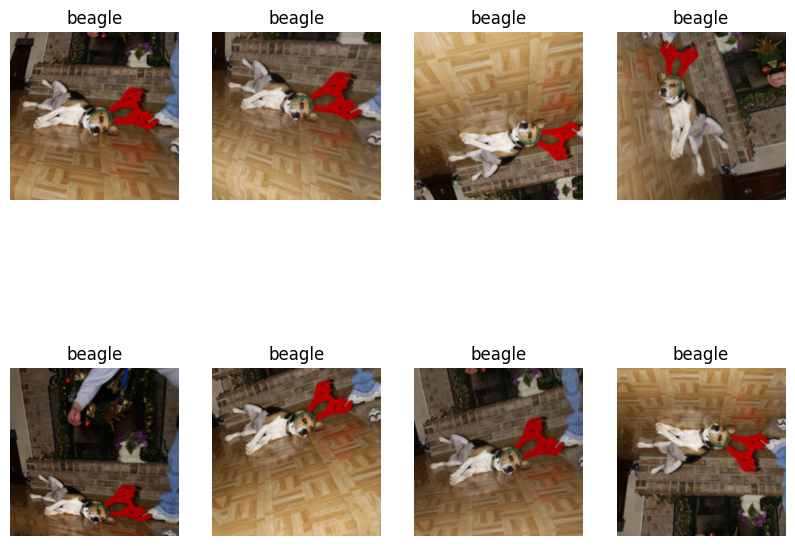

In [5]:
# Step 5: Show sample augmented images
pets_dls.show_batch(figsize=(10, 8), max_n=8, unique=True)

In [6]:

# Step 6: Define and train a simple model
learn = vision_learner(pets_dls, resnet18, metrics=accuracy)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 175MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.557525,0.560422,0.820027,00:55


epoch,train_loss,valid_loss,accuracy,time
0,1.256522,0.371207,0.883627,00:59


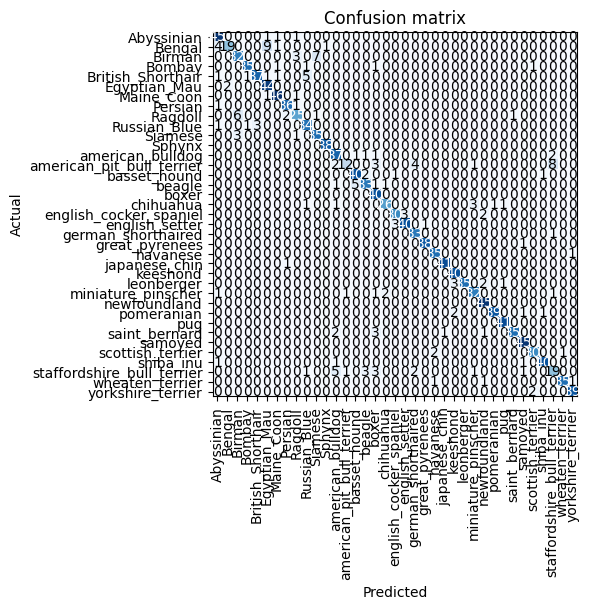

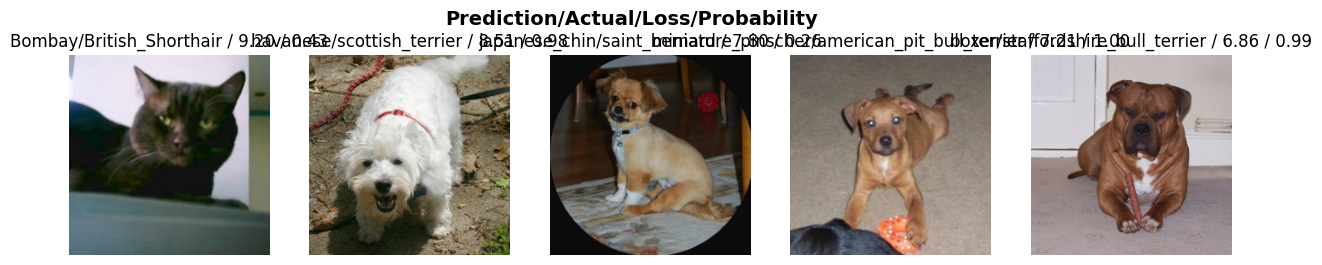

In [7]:
# Step 7: Interpret model results
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6, 6))
interp.plot_top_losses(5, nrows=1)
